# Análise do Cancelamento de Clientes

O presente relatório tem como objetivo analisar um DataSet  focado em compreender os motivos de cancelamento de planos de uma empresa tal.

## Tratamento do DataSet

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from cancellation_analysis.plots import Plot

In [37]:
data = pd.read_csv("C:/Users/guilh/OneDrive/Área de Trabalho/cancellation-analysis/data/raw/cancelamentos.csv")

In [38]:
data

,CustomerID,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
0,349936.0,23.0,Male,13.0,22.0,2.0,1.0,Standard,Annual,909.58,23.0,0.0
1,100634.0,49.0,Male,55.0,16.0,3.0,6.0,Premium,Monthly,207.00,29.0,1.0
2,301263.0,30.0,Male,7.0,1.0,0.0,8.0,Basic,Annual,768.78,7.0,0.0
3,119358.0,26.0,Male,40.0,5.0,3.0,8.0,Premium,Annual,398.00,12.0,1.0
4,130955.0,27.0,Female,17.0,30.0,5.0,6.0,Basic,Annual,507.00,15.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,195680.0,62.0,Female,35.0,7.0,2.0,8.0,Basic,Annual,232.00,15.0,1.0
49996,43477.0,36.0,Male,43.0,21.0,2.0,30.0,Basic,Quarterly,928.00,30.0,1.0
49997,169273.0,55.0,Male,42.0,8.0,1.0,12.0,Basic,Monthly,326.00,27.0,1.0
49998,310693.0,40.0,Female,14.0,19.0,1.0,17.0,Premium,Quarterly,826.76,12.0,0.0


In [39]:
data = data.drop(columns=['CustomerID'])

In [40]:
data = data.dropna()

In [41]:
data

,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
0,23.0,Male,13.0,22.0,2.0,1.0,Standard,Annual,909.58,23.0,0.0
1,49.0,Male,55.0,16.0,3.0,6.0,Premium,Monthly,207.00,29.0,1.0
2,30.0,Male,7.0,1.0,0.0,8.0,Basic,Annual,768.78,7.0,0.0
3,26.0,Male,40.0,5.0,3.0,8.0,Premium,Annual,398.00,12.0,1.0
4,27.0,Female,17.0,30.0,5.0,6.0,Basic,Annual,507.00,15.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
49995,62.0,Female,35.0,7.0,2.0,8.0,Basic,Annual,232.00,15.0,1.0
49996,36.0,Male,43.0,21.0,2.0,30.0,Basic,Quarterly,928.00,30.0,1.0
49997,55.0,Male,42.0,8.0,1.0,12.0,Basic,Monthly,326.00,27.0,1.0
49998,40.0,Female,14.0,19.0,1.0,17.0,Premium,Quarterly,826.76,12.0,0.0


In [42]:
data.to_csv('C:/Users/guilh/OneDrive/Área de Trabalho/cancellation-analysis/data/processed/cancelamentos_clean.csv', index=False, encoding='utf-8')

In [43]:
data.describe()

,idade,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,total_gasto,meses_ultima_interacao,cancelou
count,49996.000000,49996.000000,49996.000000,49996.000000,49996.000000,49996.000000,49996.000000,49996.000000
mean,39.326726,31.312625,15.817525,3.594488,13.015541,631.748695,14.514201,0.567905
std,12.405477,17.231780,8.564460,3.062435,8.257404,241.137396,8.605995,0.495372
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,9.000000,1.000000,6.000000,481.000000,7.000000,0.000000
50%,39.000000,32.000000,16.000000,3.000000,13.000000,661.000000,14.000000,1.000000
75%,48.000000,46.000000,23.000000,6.000000,19.000000,830.612500,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49996 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idade                   49996 non-null  float64
 1   sexo                    49996 non-null  object 
 2   tempo_como_cliente      49996 non-null  float64
 3   frequencia_uso          49996 non-null  float64
 4   ligacoes_callcenter     49996 non-null  float64
 5   dias_atraso             49996 non-null  float64
 6   assinatura              49996 non-null  object 
 7   duracao_contrato        49996 non-null  object 
 8   total_gasto             49996 non-null  float64
 9   meses_ultima_interacao  49996 non-null  float64
 10  cancelou                49996 non-null  float64
dtypes: float64(8), object(3)
memory usage: 4.6+ MB


In [45]:
data['cancelou'].value_counts(normalize=True) * 100

cancelou
1.0    56.790543
0.0    43.209457
Name: proportion, dtype: float64

## Análise dos dados



In [46]:
target = data['cancelou']

In [47]:
target

0        0.0
1        1.0
2        0.0
3        1.0
4        1.0
        ... 
49995    1.0
49996    1.0
49997    1.0
49998    0.0
49999    1.0
Name: cancelou, Length: 49996, dtype: float64

In [48]:
data_heatmap = data.copy()

data_heatmap['sexo'] = data_heatmap['sexo'].map({'Male': 0, 'Female': 1})
data_heatmap['assinatura'] = data_heatmap['assinatura'].map({'Basic': 0, 'Standard': 1, 'Premium': 2})
data_heatmap['duracao_contrato'] = data_heatmap['duracao_contrato'].map({'Monthly': 0, 'Quarterly': 1, 'Annual': 2})

data_heatmap.to_csv('C:/Users/guilh/OneDrive/Área de Trabalho/cancellation-analysis/data/processed/cancelamentos_encoded.csv', index=False, encoding='utf-8')

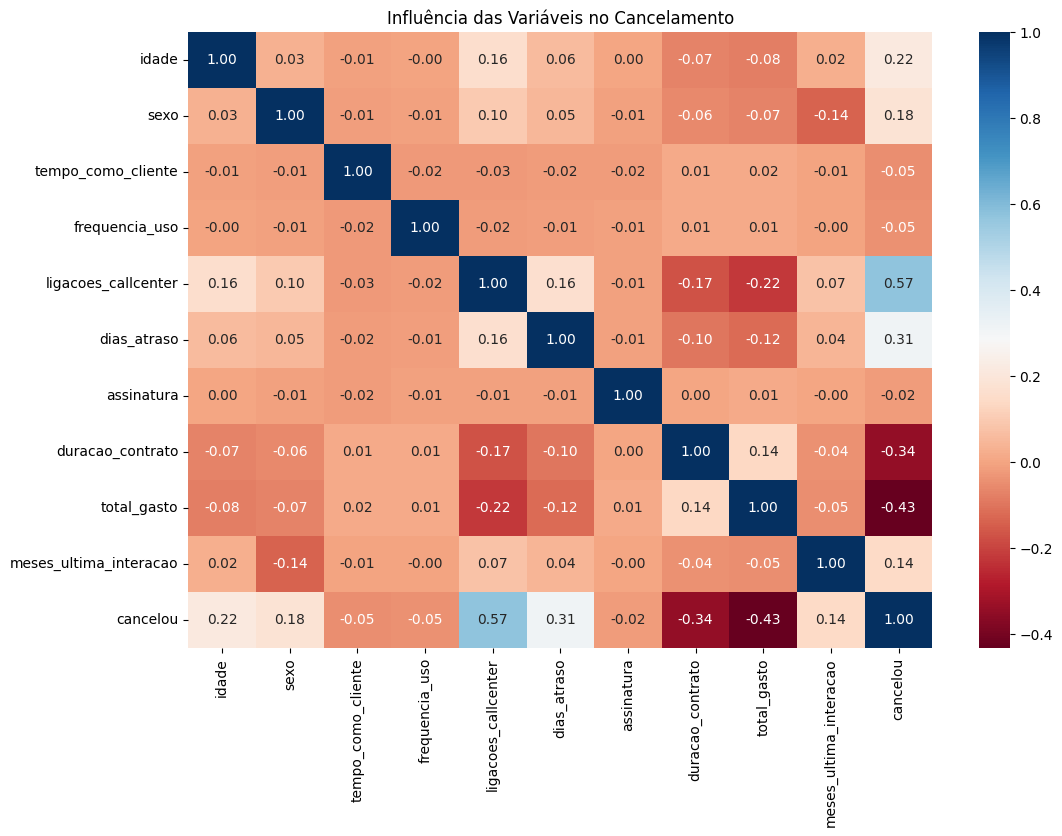

In [49]:
Plot().plot_heatmap(data_heatmap)

As variáveis mais relacionadas a nossa target são as colunas = `ligacao_callcenter`, `dias_atraso`, `total_gasto` , `duracao_contrato` , porém não faz sentido de usar como análise o total gasto pelo cliente visto que pessoas com mais gastos são clientes fiéis!

In [50]:
colunas_criticas = ['ligacoes_callcenter', 'duracao_contrato', 'dias_atraso']

In [51]:
Plot().plot_histogram(data=data, colunas=colunas_criticas, target= target)

In [52]:
for coluna in colunas_criticas:
    
    # Criamos uma tabela de frequências (Crosstab)
    df_temp = data.groupby([coluna, 'cancelou']).size().reset_index(name='contagem')
    
    # Calculamos a porcentagem dentro de cada grupo da coluna
    df_temp['porcentagem'] = df_temp.groupby(coluna)['contagem'].transform(lambda x: (x / x.sum()) * 100)

    fig = px.bar(
        df_temp, 
        x=coluna, 
        y='porcentagem', 
        color='cancelou',
        title=f'Porcentagem de Cancelamento por {coluna}',
        text=df_temp['porcentagem'].apply(lambda x: f'{x:.1f}%'),
        barmode='stack',
        color_discrete_map={0: 'blue', 1: 'red'}
    )
    
    fig.update_layout(yaxis_range=[0, 100], yaxis_title="Porcentagem (%)")
    fig.show()

## Conclusão

A análise desenvolvida contemplou a aplicação das seguintes técnicas analíticas:

- **Análise de Correlação**: identificação de dependências lineares entre variáveis por meio de *heatmap*.
- **Análise Bivariada**: avaliação da distribuição de frequências e das proporções de cancelamento por categoria de variável.
- **Tratamento de Dados**: codificação de variáveis categóricas e tratamento de valores omissos.

A partir dessas abordagens, foram identificadas descobertas estatisticamente relevantes para a empresa, conforme descrito a seguir.

### Interações com o Suporte (Call Center)

A variável **`ligacoes_callcenter`** apresentou a maior correlação positiva com o evento de cancelamento (**0,57**).

- **Ponto de inflexão**: clientes que realizam mais de **4 chamadas** ao call center apresentam taxa de cancelamento superior a **90%**.
- **Diagnóstico**: o volume de chamadas ao suporte atua como um **indicador antecedente crítico de insatisfação**, sinalizando elevado risco de cancelamento.

### Comportamento de Pagamento (Inadimplência)

A variável **`dias_atraso`** demonstrou correlação moderada com o cancelamento (**0,31**).

- **Ponto de inflexão**: observa-se um crescimento exponencial da taxa de cancelamento após **20 dias de atraso**.
- **Diagnóstico**: a inadimplência prolongada configura-se não apenas como um risco financeiro, mas também como um **forte preditor de abandono definitivo do serviço**.

### Estrutura Contratual

A variável **`duracao_contrato`** evidenciou que a estabilidade do cliente está diretamente associada à modalidade de assinatura.

- **Resultado**: contratos **mensais** concentram a maior taxa de cancelamentos.
- **Comparativo**: planos **trimestrais** e **anuais** apresentam níveis de retenção significativamente superiores.


Os resultados confirmam que o cancelamento não ocorre de forma aleatória, mas é precedido por **padrões comportamentais bem definidos**. 


In [53]:
df_final = data[data['duracao_contrato'] != 'Monthly']
df_final = df_final[df_final['ligacoes_callcenter'] <= 4]
df_final = df_final[df_final['dias_atraso'] <= 20]

df_final.to_csv('C:/Users/guilh/OneDrive/Área de Trabalho/cancellation-analysis/data/processed/cancelamentos_otimized.csv', index=False, encoding='utf-8')

display(df_final["cancelou"].value_counts(normalize=True))

cancelou
0.0    0.816462
1.0    0.183538
Name: proportion, dtype: float64

Como prova, o código acima demonstra que, 80% das assinaturas que não tem os problemas relatados não são canceladas!